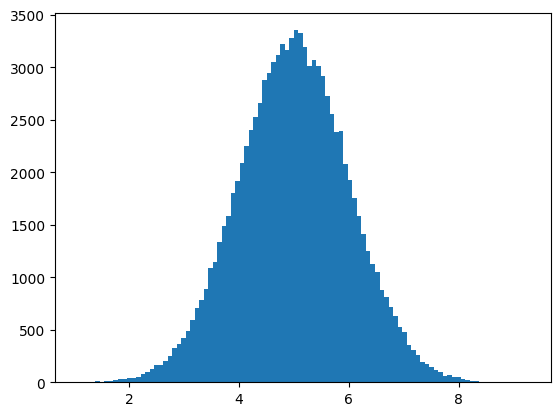

In [2]:
import numpy
import matplotlib.pyplot as plt

x = numpy.random.normal(5.0, 1.0, 100000)

plt.hist(x, 100)
plt.show()

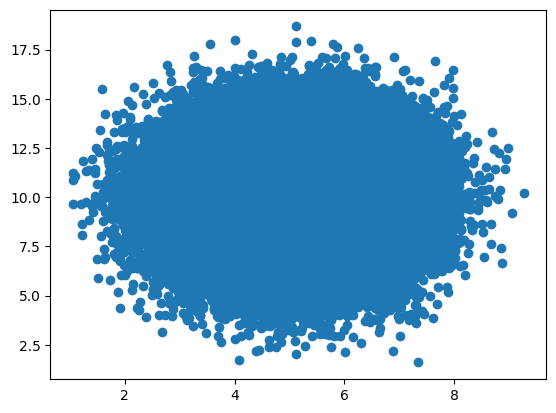

In [3]:
y = numpy.random.normal(10.0, 2.0, 100000)

plt.scatter(x,y)
plt.show()

In [4]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [5]:
with open('/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('您好 Google Drive!')
!cat '/gdrive/My Drive/foo.txt'

您好 Google Drive!

In [6]:
# Import PyDrive and associated libraries.
# This only needs to be done once in a notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [8]:
# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [12]:
# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'PyDriveSample.txt'})
uploaded.SetContentString('Sample upload file content 範例')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1yGBmzG0VSks0lRq0FkSRi1yW7GQ749dG


# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'PyDriveSample.txt'})
uploaded.SetContentString('Sample upload file content 範例')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

In [13]:
# List .txt files in the root.
#
# Search query reference:
# https://developers.google.com/drive/v2/web/search-parameters
listed = drive.ListFile({'q': "title contains '.txt' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, date {}, id {}'.format(file['title'], file['createdDate'], file['id']))

title PyDriveSample.txt, date 2024-10-21T05:56:31.817Z, id 1yGBmzG0VSks0lRq0FkSRi1yW7GQ749dG
title foo.txt, date 2024-10-15T13:20:35.019Z, id 18G0WX_YVkoCVuyITsvhqGLBDqwZNdgC3
title PyDriveSample.txt, date 2024-10-15T13:30:49.287Z, id 1rvpb96jLGm9QZoAscbA26QSV7p6o964f


In [15]:
# Download a file based on its file ID.
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
# **Replace 'YOUR_FILE_ID' with the actual ID of the file you want to download.**
file_id = '1yGBmzG0VSks0lRq0FkSRi1yW7GQ749dG'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

Downloaded content "Sample upload file content 範例"


In [16]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')

xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-2.0, 1.0, 4.0, 7.0, 10.0, 13.0], dtype=float)
# 以上code定義此neural network

model.fit(xs, ys, epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - loss: 76.4440
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 60.1443
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 47.3204
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 37.2311
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 29.2934
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 23.0483
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 18.1349
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 14.2693
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 11.2280
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 8.8352
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 6.9526
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 5.4715
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 4.3061
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 3.3893
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.6679
Epoch 16/100
1/1 ━━━━

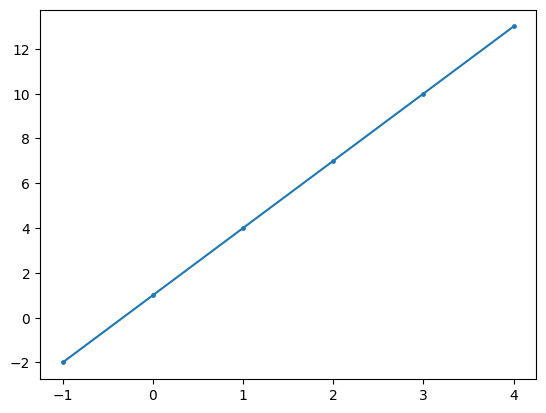

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
slope, intercept, r, p, std_err = stats.linregress(xs, ys)

def myfunc(v):
  return slope * v + intercept

mymodel = list(map(myfunc, xs))
plt.scatter(xs,ys,6)
plt.plot(xs, mymodel)
plt.show()

In [21]:
print(model.predict(np.array([10.0])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
[[30.898052]]
